In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
# import os
# os.chdir("D:\\Academic Operations\\Online + BACP\\Data Mining (Machine Learning)\\New Content by Gurumoorthy\\Final\\Codes and Datasets\\Codes and Datasets\\Codes and Datasets\\Decision Trees\\CART\\Python")

In [51]:
credit_df = pd.read_csv("heart.csv")

In [52]:
credit_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
credit_df.shape

(303, 14)

In [54]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

# for feature in credit_df.columns: 
#     if credit_df[feature].dtype == 'object': 
#         credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Converts the Categorical output integers values of numpy array before storing it



In [55]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
credit_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("target" , axis=1)

y = credit_df.pop("target")




In [88]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

X_test.shape

(91, 13)

In [60]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [61]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [62]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()



In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))


               Imp
cp        0.258870
ca        0.124819
oldpeak   0.124819
thal      0.074463
age       0.073440
thalach   0.065599
slope     0.064039
trestbps  0.055291
sex       0.054394
fbs       0.028669
chol      0.027456
restecg   0.027366
exang     0.020774


In [67]:
y_predict = dt_model.predict(X_test)

#                                      Regularising the Decision Tree

In [89]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=0) #min_samples_leaf=6,min_samples_split=15)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [92]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))


               Imp
cp        0.268492
oldpeak   0.149242
ca        0.129459
thal      0.077231
chol      0.069979
sex       0.056416
age       0.056346
slope     0.050561
thalach   0.049158
fbs       0.029735
trestbps  0.028319
exang     0.021546
restecg   0.013516


In [102]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [103]:
import matplotlib.pyplot as plt

AUC: 0.999


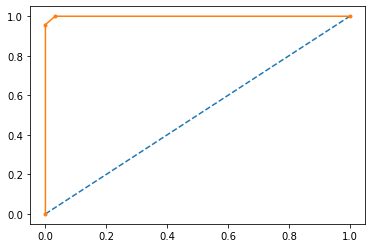

In [104]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
# print(probs)
probs = probs[:, 1]
# print(probs)
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.758


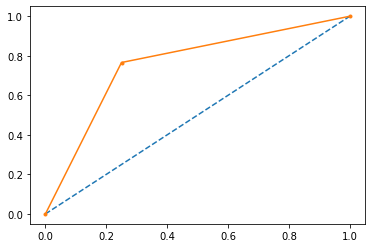

In [105]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        94
           1       0.98      1.00      0.99       118

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.99       212
weighted avg       0.99      0.99      0.99       212



In [108]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [109]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 91,   3],
       [  0, 118]], dtype=int64)

In [110]:
confusion_matrix(test_labels, ytest_predict)

array([[33, 11],
       [11, 36]], dtype=int64)

In [82]:
reg_dt_model.score(X_train,train_labels)

0.8726415094339622

In [83]:
reg_dt_model.score(X_test,test_labels)

0.7802197802197802